# Обработка результатов эксперимента

Определение степени и угла поляризации неба.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from os import listdir
from os.path import isfile, join

In [8]:
path_to_results = 'exam_demonstration'
stokes_parametrs = np.loadtxt('stokes_parametrs.txt')

In [9]:
def polarization(polarization_0: np.ndarray,
                 polarization_90: np.ndarray,
                 polarization_45: np.ndarray,
                 polarization_135: np.ndarray) -> dict:
    """Рассчитавает степень и угол поляризации каждого пикселя

    Args:
        polarization_0 (np.ndarray): фотография через поляроид 
        polarization_90 (np.ndarray): фотография через поляроид, скрещенный к исходному
        polarization_45 (np.ndarray): фотография через поляроид с осью под 45 к исходному
        polarization_135 (np.ndarray): фотография через поляроид с осью под 135 к исходному

    Returns:
        dict: Степень поляризации и угол поляризации каждого из пикселей
    """
    global stokes_parametrs
    if len(polarization_0.shape) - 2:
        pass
    intensity_matrix = np.array([polarization_0,  
                                 polarization_90,  
                                 polarization_45,  
                                 polarization_135],
                                 dtype = np.float64)
    s = np.tensordot(stokes_parametrs, intensity_matrix, axes = 1) 
    dolp = np.sqrt(np.power(s[1], 2) + np.power(s[2], 2)) / s[0]
    aop = 0.5 * np.angle(s[1] + 1j * s[2])
    return {'linear_polarizatioin_degree': dolp,
            'angle_of_polarization': aop,
            's0': s[0],
            's1': s[1],
            's2': s[2]}

In [10]:
def polarization_2(polarization_0: np.ndarray,
                 polarization_90: np.ndarray,
                 polarization_45: np.ndarray,
                 polarization_135: np.ndarray) -> dict:
    """Рассчитавает степень и угол поляризации каждого пикселя

    Args:
        polarization_0 (np.ndarray): фотография через поляроид 
        polarization_90 (np.ndarray): фотография через поляроид, скрещенный к исходному
        polarization_45 (np.ndarray): фотография через поляроид с осью под 45 к исходному
        polarization_135 (np.ndarray): фотография через поляроид с осью под 135 к исходному

    Returns:
        dict: Степень поляризации и угол поляризации каждого из пикселей
    """
    s0 = polarization_0 + polarization_90
    s1 = polarization_0 - polarization_90
    s2 = s0 - 2 * polarization_135
    dolp = np.sqrt(np.power(s1, 2) + np.power(s2, 2)) / s0
    aop = 0.5 * np.angle(s1 + 1j * s2)
    return {'linear_polarizatioin_degree': dolp,
            'angle_of_polarization': aop,
            's0': s0,
            's1': s1,
            's2': s2}

# Эксперимент проводился 29 мая

In [12]:
measurment_time = []
for line in open(path_to_results + "/sync_exam.txt"):
    measurment_time.append(line[:-1])
measurment_time = measurment_time[1:]
print(measurment_time)

['07_50_13', '07_50_21', '07_50_29', '07_50_37', '07_50_45', '07_50_53', '07_51_01', '07_51_10', '07_51_18', '07_51_26', '07_51_34', '07_51_42', '07_51_50', '07_51_58', '07_52_06', '07_52_14', '07_52_22', '07_52_30', '07_52_38', '07_52_46', '07_52_54', '07_53_02', '07_53_10', '07_53_18', '07_53_26', '07_53_34', '07_53_42', '07_53_50', '07_53_58', '07_54_06', '07_54_15', '07_54_23', '07_54_31', '07_54_39', '07_54_47', '07_54_55', '07_55_03', '07_55_11', '07_55_19', '07_55_27', '07_55_35', '07_55_43', '07_55_51', '07_55_59', '07_56_07', '07_56_15', '07_56_23', '07_56_31', '07_56_39', '07_56_47', '07_56_55', '07_57_03', '07_57_12', '07_57_20', '07_57_28', '07_57_36', '07_57_44', '07_57_52', '07_58_00', '07_58_08', '07_58_16', '07_58_24', '07_58_32', '07_58_40', '07_58_48', '07_58_56', '07_59_04', '07_59_12', '07_59_20', '07_59_28', '07_59_36', '07_59_44', '07_59_52', '08_00_00', '08_00_08', '08_00_17', '08_00_25', '08_00_33', '08_00_41', '08_00_49', '08_00_57', '08_01_05', '08_01_13', '08

In [13]:
def get_images_by_time(time: str) -> tuple:
    """Фотографии сделанные в данное время


    Returns:
        tuple: (polatization_0, polatization_90, polatization_45, polatization_135)
    """
    result = []
    for polarization in [0, 90, 45, 135]:
        result.append(path_to_results + '/' + time + f'_polarization_{polarization}.npy')
    return tuple([np.load(path) for path in result])

In [14]:
measurment_path = 'exam_demonstration_results'

In [15]:
for time in measurment_time:
    try:
        img_0, img_90, img_45, img_135 = get_images_by_time(time)
        polarization_info = polarization_2(img_0, img_90, img_45, img_135)
        np.save(measurment_path + '/' + f"{time}_dolp.npy", polarization_info['linear_polarizatioin_degree'])
        np.save(measurment_path + '/' + f"{time}_aop.npy", polarization_info['angle_of_polarization'])
        np.save(measurment_path + '/' + f"{time}_s0.npy", polarization_info['s0'])
        np.save(measurment_path + '/' + f"{time}_s1.npy", polarization_info['s1'])
        np.save(measurment_path + '/' + f"{time}_s2.npy", polarization_info['s2'])
    except:
        pass

/tmp/ipykernel_11427/4180160210.py:19: RuntimeWarning: divide by zero encountered in divide
  dolp = np.sqrt(np.power(s1, 2) + np.power(s2, 2)) / s0
/tmp/ipykernel_11427/4180160210.py:19: RuntimeWarning: invalid value encountered in divide
  dolp = np.sqrt(np.power(s1, 2) + np.power(s2, 2)) / s0


### Анимация

In [ ]:
measurment_file_names = [f for f in listdir(measurment_path) if isfile(join(measurment_path, f))]
dolp_file_names = [f for f in measurment_file_names if 'dolp' in f]
experiment_time = [f[:8] for f in dolp_file_names]

KeyboardInterrupt: 

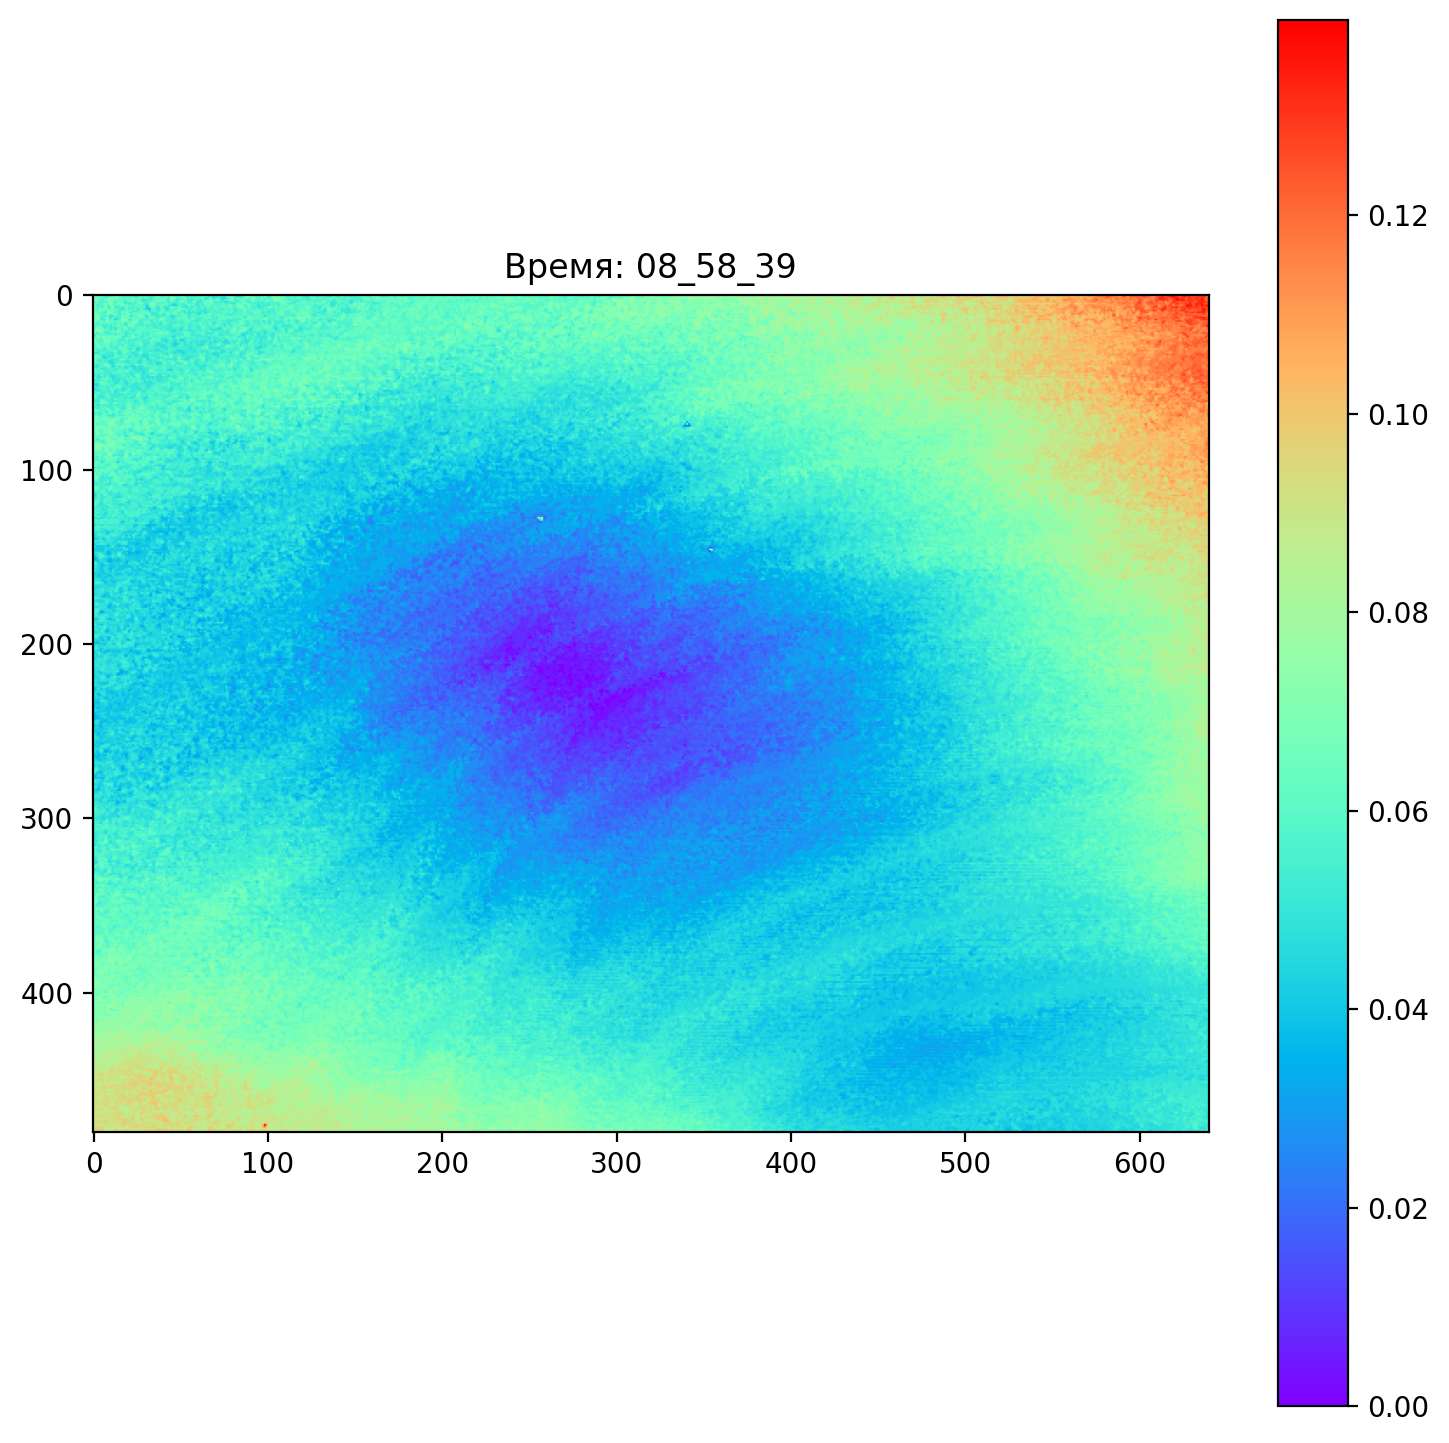

In [ ]:
def animate(i):
    global colorbar
    if colorbar: colorbar.remove() 
    ax.set_title("Время: " + experiment_time[i])
    im = ax.imshow(np.load(measurment_path + '/' + dolp_file_names[i]), cmap = 'rainbow')
    colorbar = plt.colorbar(im)

fig, ax = plt.subplots(figsize = (9, 9), dpi = 200)
colorbar = 0


animation = FuncAnimation(fig, animate, frames = len(dolp_file_names), interval = 10, blit = False)
animation.save('29_may_polarization_degree_2.mp4',  writer="ffmpeg", fps = 60)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from os import listdir
from os.path import isfile, join
from datetime import datetime


def get_photo_at_exact_time(time: str, arr):
    for i in arr:
        if time in i:
            return i

def animate(i):
    global cb1, cb2
    if cb2: cb2.remove()
    if cb1: cb1.remove()
    iteration = i + offset
    time = experiment_time_sorted[iteration]

    im = ax[0, 0].imshow(np.load(measurment_path + '/' + dolp_file_names_dict[time]), cmap = 'rainbow')
    ax[0, 0].set_title("Степень линейной поляризации")
    cb1 = plt.colorbar(im)
    im = ax[1, 0].imshow(np.load(measurment_path + '/' + aop_file_names_dict[time]), cmap = 'rainbow')
    cb2 = plt.colorbar(im)
    ax[1, 0].set_title("Угол поляризации")
    ax[0, 1].imshow(np.load(measurment_path + '/' + s0_file_names_dict[time]), cmap = 'gray')
    ax[0, 1].set_title("S0")
    ax[1, 1].imshow(np.load(measurment_path + '/' + s0_file_names_dict[time]), cmap = 'gray', alpha = 1)


    x = np.arange(0, photo_x_shape, 20)
    y = np.arange(0, photo_y_shape, 20)


    X, Y = np.meshgrid(x, y)

    U = np.sin(np.load(measurment_path + '/' + aop_file_names_dict[time])[X, Y])
    V = np.cos(np.load(measurment_path + '/' + aop_file_names_dict[time])[X, Y])

    ax[1, 1].quiver(Y, X, U, V, color = 'red', headlength=0, headaxislength=0, alpha = 1, linewidth = 4)
    ax[1, 1].set_title("Угол поляризации")

    fig.suptitle(f"Время {time}")


measurment_path = 'meausurment_1'

measurment_file_names = [f for f in listdir(measurment_path) if isfile(join(measurment_path, f))]
dolp_file_names = [f for f in measurment_file_names if 'dolp' in f]
experiment_time = list(set([f[:8] for f in dolp_file_names]))
aop_file_names = [f for f in measurment_file_names if 'aop' in f]
s0_file_names = [f for f in measurment_file_names if 's0' in f]
experiment_time_sorted = []
for time_string in experiment_time:
    time_obj = datetime.strptime(time_string, "%H_%M_%S")
    experiment_time_sorted.append(time_obj)

experiment_time_sorted = sorted(experiment_time_sorted)
experiment_time_sorted = [datetime.strftime(time_obj, "%H_%M_%S") for time_obj in experiment_time_sorted]
dolp_file_names_dict = {time: get_photo_at_exact_time(time, dolp_file_names) for time in experiment_time}
aop_file_names_dict = {time: get_photo_at_exact_time(time, aop_file_names) for time in experiment_time}
s0_file_names_dict = {time: get_photo_at_exact_time(time, s0_file_names) for time in experiment_time}
photo_x_shape = np.load(measurment_path + '/' + s0_file_names[0]).shape[0]
photo_y_shape = np.load(measurment_path + '/' + s0_file_names[0]).shape[1]

cb1, cb2 = 0, 0
offset = 1700
fig, ax = plt.subplots(2, 2, figsize = (20, 9), dpi = 200)

animation = FuncAnimation(fig, animate, frames = len(experiment_time_sorted) - offset, interval = 10, blit = False)
animation.save('animation_since_13_00.mp4',  writer="ffmpeg", fps = 60)